In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn

In [2]:
df = pd.read_csv("q5_train.csv")
lmbda = [0.0001]
for i in range(50):
    lmbda.append(lmbda[i]*math.sqrt(3))

from sklearn.linear_model import Lasso, Ridge

In [3]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,-0.079169,0.074364,0.081928,-0.033283,-0.088749,0.070283,0.285273,0.347548,0.917105
std,0.925317,1.012305,1.304607,1.247467,1.467449,0.969372,1.917598,7.667971,5.020843
min,-2.619745,-2.025143,-4.118158,-3.112832,-4.163859,-2.481295,-4.639841,-40.282934,-10.036450
25%,-0.571875,-0.758508,-0.739871,-0.752772,-0.990666,-0.577054,-1.194308,-0.351381,-2.293765
50%,-0.073228,0.185544,0.095554,-0.063393,-0.030977,-0.047225,0.486986,-0.031732,1.218981
75%,0.382786,0.662315,0.966070,0.755977,0.765230,0.731163,1.666643,0.337055,4.908557
max,2.463242,3.852731,4.339446,3.230194,3.392913,2.515546,5.790406,57.567106,11.343062


In [10]:
filtered_df = df[(df['x8']>-1.5) & (df['x8']<1.5)]

In [11]:
filtered_df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,-0.078680,0.068273,0.063436,-0.023586,-0.076222,0.048360,0.257406,-0.008922,0.934013
std,0.932328,1.017554,1.321319,1.255709,1.497321,0.972460,1.908237,0.455622,5.060132
min,-2.619745,-2.025143,-4.118158,-3.112832,-4.163859,-2.481295,-4.639841,-1.026009,-10.036450
25%,-0.586575,-0.768053,-0.757134,-0.753959,-0.980459,-0.583383,-1.227533,-0.333052,-2.343863
50%,-0.035269,0.185544,0.045877,-0.063393,-0.030977,-0.058526,0.486986,-0.031732,1.368610
75%,0.396963,0.655263,0.935450,0.728736,0.810560,0.637993,1.654030,0.326132,4.910296
max,2.463242,3.852731,4.339446,3.230194,3.392913,2.515546,5.790406,1.099648,11.343062


# Task 1

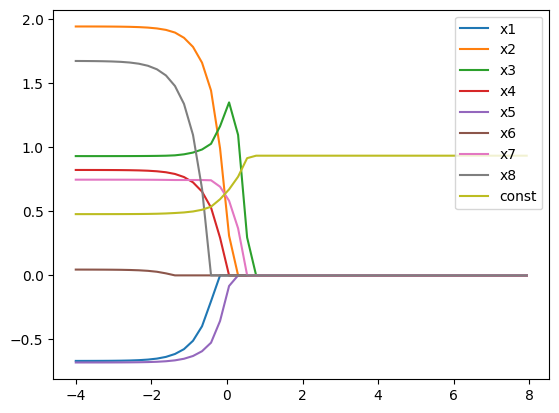

In [6]:
coefs = []
consts = []
for l in lmbda:
    md = Lasso(alpha=l)
    md.fit(filtered_df[list(filtered_df.columns)[:-1]], filtered_df['y'])
    coefs.append(md.coef_)
    consts.append(md.intercept_)

coefs = np.stack(coefs, axis=0)
consts = np.array(consts).reshape((-1, 1))
coefs = np.concatenate([coefs, consts], axis=1)

plt.plot(np.log10(lmbda), coefs)
plt.legend(labels = list(df.columns)[:-1]+['const'])


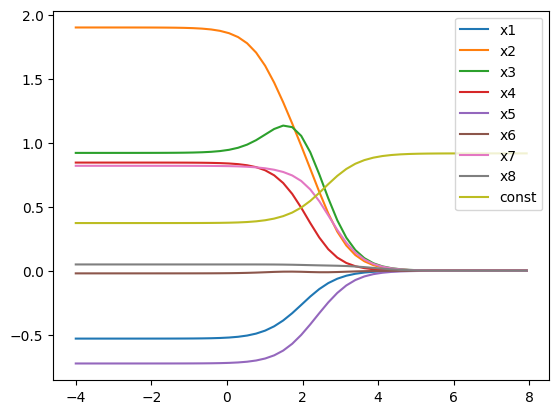

In [7]:
filtered_df=df
coefs = []
consts = []
for l in lmbda:
    md = Ridge(alpha=l)
    md.fit(filtered_df[list(df.columns)[:-1]], filtered_df['y'])
    coefs.append(md.coef_)
    consts.append(md.intercept_)

coefs = np.stack(coefs, axis=0)
consts = np.array(consts).reshape((-1, 1))
coefs = np.concatenate([coefs, consts], axis=1)

plt.plot(np.log10(lmbda), coefs)
plt.legend(labels = list(df.columns)[:-1]+['const'])

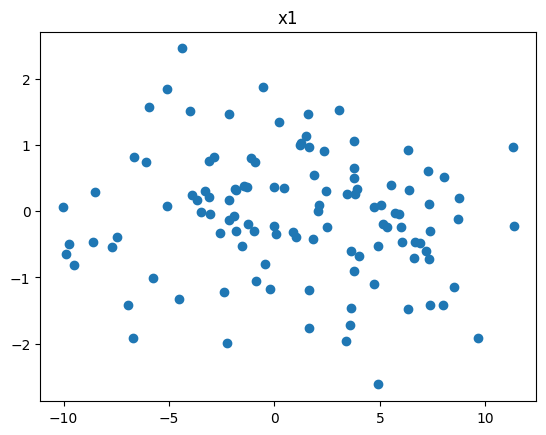

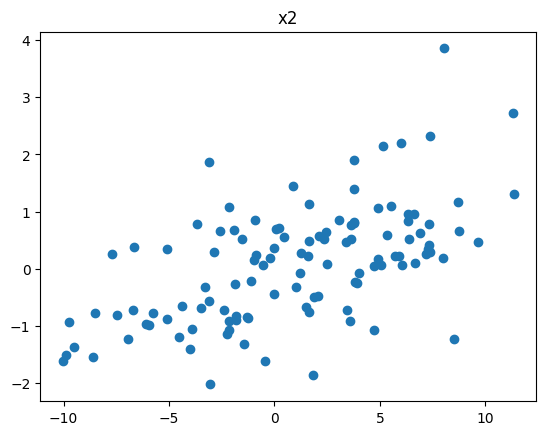

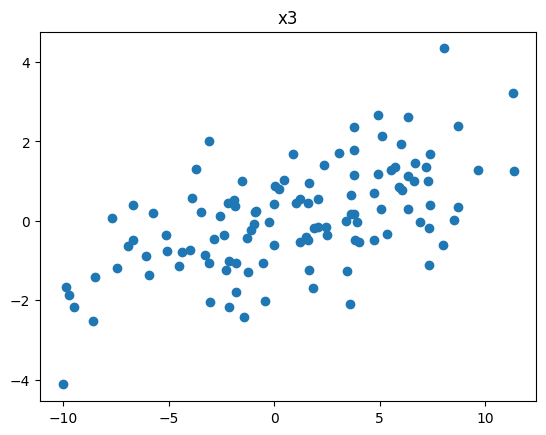

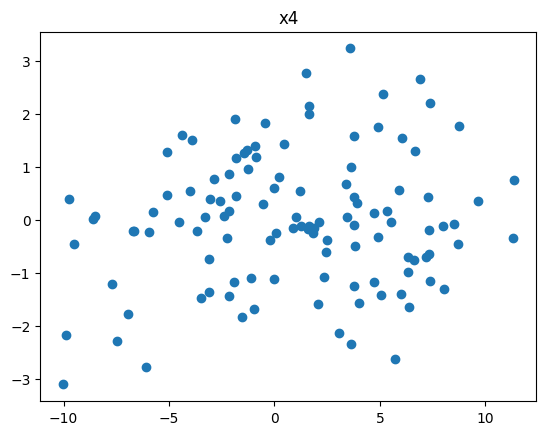

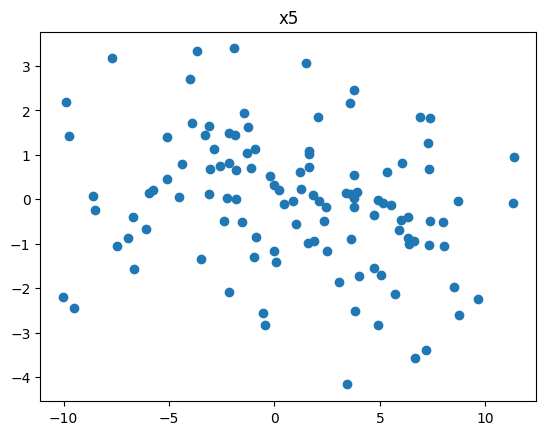

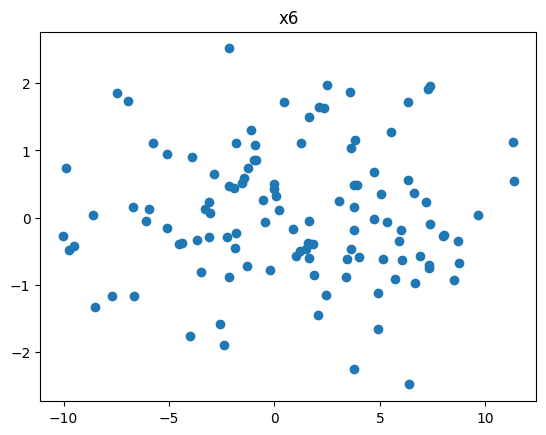

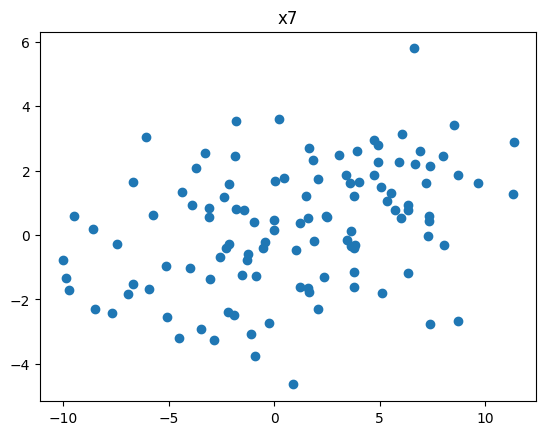

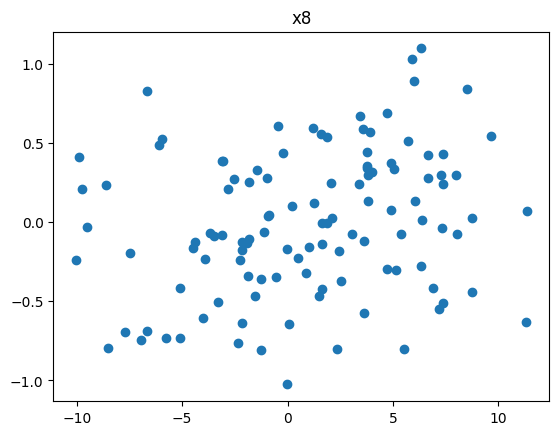

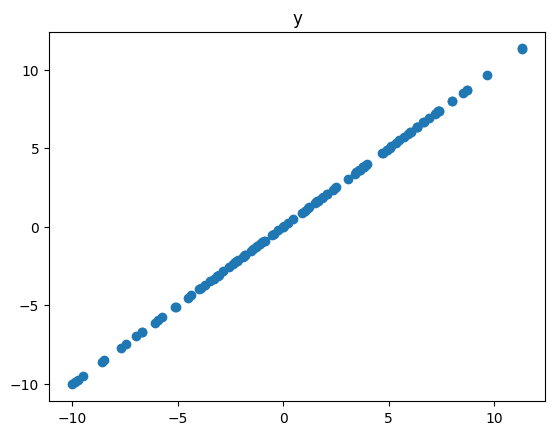

In [12]:
for col in df.columns:
    plt.figure()
    plt.scatter( filtered_df['y'], filtered_df[col])
    plt.title(col)

In [13]:
def mse(coefs, X, y):
   X2 = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
   diff = ( y.reshape((1, -1)) - coefs @ X2.T )**2
   mse = np.mean(diff, axis=1)
   return mse.reshape((-1, 1))

def r2(coefs, X, y):
   X2 = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
   diff = ((y.reshape((1, -1)))-coefs@X2.T )**2
   ssq = np.sum(diff, axis=1).reshape((-1, 1))
   ym = np.mean(y)
   vary = np.sum((y-ym)**2)
   toret = (1-ssq/vary).reshape((-1, 1))
   return toret

In [14]:
def train_ridge(df):
    cols = np.array(df.columns, dtype="str")
    cols = cols[cols != "y"]
    X = df[cols]
    y = df["y"]
    global lmbda
    coefs = []
    const=[]
    for l in lmbda:
        md = Ridge(alpha= l)
        md.fit(X, y)
        coefs.append(md.coef_)
        const.append(md.intercept_)

    coefs = np.stack(coefs, axis=0)
    const = np.array(const).reshape((-1, 1))
    coefs = np.concatenate([coefs, const], axis=1)
    return coefs

def train_lasso(df):
    cols = np.array(df.columns, dtype="str")
    cols = cols[cols != "y"]
    X = df[cols]
    y = df["y"]
    global lmbda
    const=[]
    coefs = []
    for l in lmbda:
        md = Lasso(alpha= l)
        md.fit(X, y)
        coefs.append(md.coef_)
        const.append(md.intercept_)

    coefs = np.stack(coefs, axis=0)
    const = np.array(const).reshape((-1, 1))
    coefs = np.concatenate([coefs, const], axis=1)
    return coefs

In [15]:
np.set_printoptions(
    precision=3,      # decimal places
    suppress=True,    # no scientific notation for small numbers
    linewidth=120     # avoid ugly line breaks
)
cf = train_lasso(filtered_df)
dying_times = {}
for i in range(8):
    r = cf[:, i]
    inds = np.where(abs(r)<0.1)
    dying_times[f"x{i+1}"] = np.min(inds)

dying_times

{'x1': np.int64(16),
 'x2': np.int64(18),
 'x3': np.int64(20),
 'x4': np.int64(17),
 'x5': np.int64(17),
 'x6': np.int64(0),
 'x7': np.int64(19),
 'x8': np.int64(15)}

x6 is driven to zero real fast. seems from the plot they are pretty uncorrelated, the coefficient is small to begin with

In [16]:
cf = train_ridge(df)
dying_times = {}
for i in range(8):
    r = cf[:, i]
    inds = np.where(abs(r)<0.01)
    dying_times[f"x{i+1}"] = np.min(inds)

dying_times
    

{'x1': np.int64(33),
 'x2': np.int64(36),
 'x3': np.int64(37),
 'x4': np.int64(34),
 'x5': np.int64(35),
 'x6': np.int64(22),
 'x7': np.int64(37),
 'x8': np.int64(36)}

x2 and x3 are correlated. x4 and x5 somewhat, rest seem to be independent

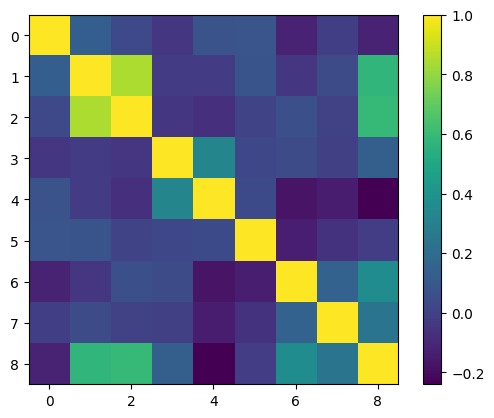

In [17]:
plt.imshow(filtered_df.corr())
plt.colorbar()

In [18]:
filtered_df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,y
x1,1.000000,0.130989,0.034155,-0.043840,0.078808,0.089200,-0.120371,-0.007606,-0.122617
x2,0.130989,1.000000,0.846546,-0.025819,-0.020711,0.082965,-0.042705,0.042843,0.574256
x3,0.034155,0.846546,1.000000,-0.044314,-0.069255,0.016261,0.061400,-0.000821,0.591693
x4,-0.043840,-0.025819,-0.044314,1.000000,0.322694,0.030849,0.049902,-0.004341,0.137450
x5,0.078808,-0.020711,-0.069255,0.322694,1.000000,0.038401,-0.174298,-0.140482,-0.239799
x6,0.089200,0.082965,0.016261,0.030849,0.038401,1.000000,-0.137414,-0.056541,-0.014544
x7,-0.120371,-0.042705,0.061400,0.049902,-0.174298,-0.137414,1.000000,0.151803,0.361607
x8,-0.007606,0.042843,-0.000821,-0.004341,-0.140482,-0.056541,0.151803,1.000000,0.237786
y,-0.122617,0.574256,0.591693,0.137450,-0.239799,-0.014544,0.361607,0.237786,1.000000


In [19]:
c2 = filtered_df['x2'].to_numpy()
c3 = filtered_df['x3'].to_numpy()

lst = []
for i in range(-2000, 2000):
    alpha = i/2000
    col = c2+alpha*c3
    v = np.corrcoef(col, filtered_df['y'])
    lst.append(v[0, 1])

lst = np.array(lst)
ind = np.argmax(lst)

In [20]:
ind

np.int64(3999)

TODO
lasso and ridge on normalized data

In [21]:
filtered_df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,-0.078680,0.068273,0.063436,-0.023586,-0.076222,0.048360,0.257406,-0.008922,0.934013
std,0.932328,1.017554,1.321319,1.255709,1.497321,0.972460,1.908237,0.455622,5.060132
min,-2.619745,-2.025143,-4.118158,-3.112832,-4.163859,-2.481295,-4.639841,-1.026009,-10.036450
25%,-0.586575,-0.768053,-0.757134,-0.753959,-0.980459,-0.583383,-1.227533,-0.333052,-2.343863
50%,-0.035269,0.185544,0.045877,-0.063393,-0.030977,-0.058526,0.486986,-0.031732,1.368610
75%,0.396963,0.655263,0.935450,0.728736,0.810560,0.637993,1.654030,0.326132,4.910296
max,2.463242,3.852731,4.339446,3.230194,3.392913,2.515546,5.790406,1.099648,11.343062


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
from sklearn.linear_model import RidgeCV, LassoCV

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
cols = ['x1','x2', 'x3', 'x4', 'x5', 'x7', 'x8']
md = LinearRegression()
md.fit(filtered_df[cols], filtered_df['y'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
t1 = np.arange(10)
t2 = np.arange(20)
np.concatenate([t1, t2], axis=0)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [ ]:
# cross validation

# the idea is that i will train and test on several splits on my own to verify if i should keep x3 or not based on wether i get imporvement in mse or not

def cv(cols, df):
    n = len(df)
    ratio = 0.8
    k=5
    shuff = np.random.permutation(n)
    splits = np.array_split(shuff, k)
    for i in range(k):
        train_inds = np.concatenate( splits[:i]+splits[i+1:], axis=0)
        test_inds = splits[i]
        train = df.iloc[train_inds]
        test = df.iloc[test_inds]
        md = RidgeCV(lmbda)
    

In [ ]:
pred8 = LinearRegression()
pred8.fit(filtered_df[cols[:-1]], filtered_df['x8'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
pred8.coef_

array([ 0.   ,  0.099, -0.07 ,  0.01 , -0.04 ,  0.036])

In [ ]:
md.alpha_

np.float64(0.0001)

In [ ]:
md.coef_

array([-0.752,  2.985,  0.805, -0.706,  0.805,  1.516])

In [ ]:
md.intercept_

In [ ]:
test = pd.read_csv('q5_test.csv')

In [ ]:
pred_for_test = pred8.predict(test[cols[:-1]])

In [ ]:
test['x8'] = np.where(abs(test['x8'])<1.5, test['x8'], 0)

<Axes: >

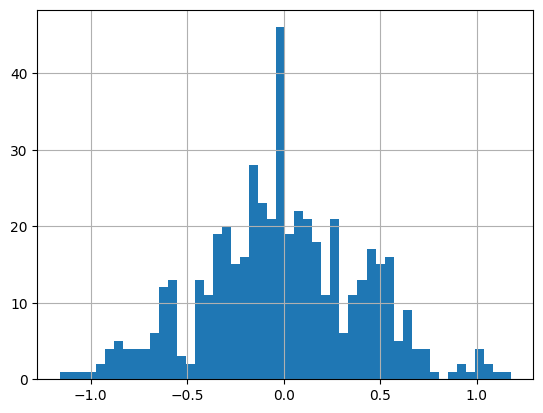

In [ ]:
test['x8'].hist(bins=50)

In [ ]:
y = md.predict(test[cols])

In [ ]:
ids = test['Id'].to_numpy(dtype=np.int64)

In [ ]:
y

array([  4.373,   6.864,  -0.762,  -0.091,  -3.582,  -4.573,   1.548,  -4.196,  -0.223,   3.04 ,  -5.445,  -0.67 ,
         4.59 ,   0.448,   2.572,  -0.549,   4.154,   2.036,  -4.834,  -3.113,   1.851,   5.638,  -1.388,  -0.034,
         1.527,   4.226,   2.06 ,  -3.272,   0.737,  -3.705,   5.073,  -4.119,  -3.338,  -1.864,   2.196,   0.581,
         1.99 ,  -7.229,   6.67 ,  -1.647,   3.519,  -1.231,   3.32 ,   7.549,  -0.444,   6.842,   0.587,  -2.187,
         0.923,   3.217,   4.406,  -2.808,   6.891,  -0.172,  -2.529,   4.902,   2.008,  -4.802,   2.228,  -0.544,
        -0.47 ,   3.729,  -0.983,   5.045,  -2.891,   1.765,   2.913,   3.036,   3.618,  -0.892,  -2.995,   4.005,
        -3.829,   0.022,  -3.221,   3.807,  -3.27 ,  -0.722,  -2.582,  -5.284,  -4.018,  -2.786,  -1.731,   1.603,
         1.283,   6.423,   7.898,  -0.046,   6.158,   1.202,   2.978,   5.27 ,   1.927,   1.23 ,  -3.437,  -3.24 ,
         3.608,   1.723,   0.038,   9.275,  -0.461,   0.228,   0.222,  -0.36 ,  

In [ ]:
out = pd.DataFrame({
    'Id':ids,
    'y':y
})

In [ ]:
np.mean(y**2)

np.float64(14.069909745767944)

In [ ]:
out.to_csv('output.csv', index=False)